In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Define target variable and feature variables
target_column = "Load_power"
features = data.drop(columns=['Date', target_column], errors='ignore')
target = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Data standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize SVR model
svr_model = SVR(kernel='rbf', C=1.5, epsilon=0.1, gamma=0.03)

In [2]:
# Train the model
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on training and testing sets
y_train_pred_scaled = svr_model.predict(X_train_scaled)
y_test_pred_scaled = svr_model.predict(X_test_scaled)

# Convert predictions back to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training R² Score: {train_r2}")
print(f"Testing Mean Squared Error (MSE): {test_mse}")
print(f"Testing R² Score: {test_r2}")
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")

# Save training and testing predictions
train_results = pd.DataFrame({
    "Date": data.loc[y_train.index, 'Date'],
    "Actual": y_train.values,
    "Predicted": y_train_pred
})

test_results = pd.DataFrame({
    "Date": data.loc[y_test.index, 'Date'],
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

# Combine training and testing results
results = pd.concat([train_results, test_results])

# Sort by Date in ascending order
results_sorted = results.sort_values(by='Date')

# Save
output_file = "SVR_Predictions.csv"
results_sorted.to_csv(output_file, index=False)
print(f"Prediction results have been saved to {output_file}")

Training Mean Squared Error (MSE): 0.0009065875376026768
Training R² Score: 0.9518657421623483
Testing Mean Squared Error (MSE): 0.0015030234733095546
Testing R² Score: 0.9221783298006221
Training MAE: 0.021669354716102717
Testing MAE: 0.030770776710357054
Prediction results have been saved to SVR_Predictions.csv


Data Preview:
        Date    Actual  Predicted
0 2019-01-01  0.882168   0.946436
1 2019-01-02  0.995249   0.981523
2 2019-01-03  0.998937   0.985151
3 2019-01-04  0.979336   0.933820
4 2019-01-05  0.938859   0.871621
Time Series plot saved at: E:/Desktop/Actual_vs_Predicted_Over_Time_SVR.png


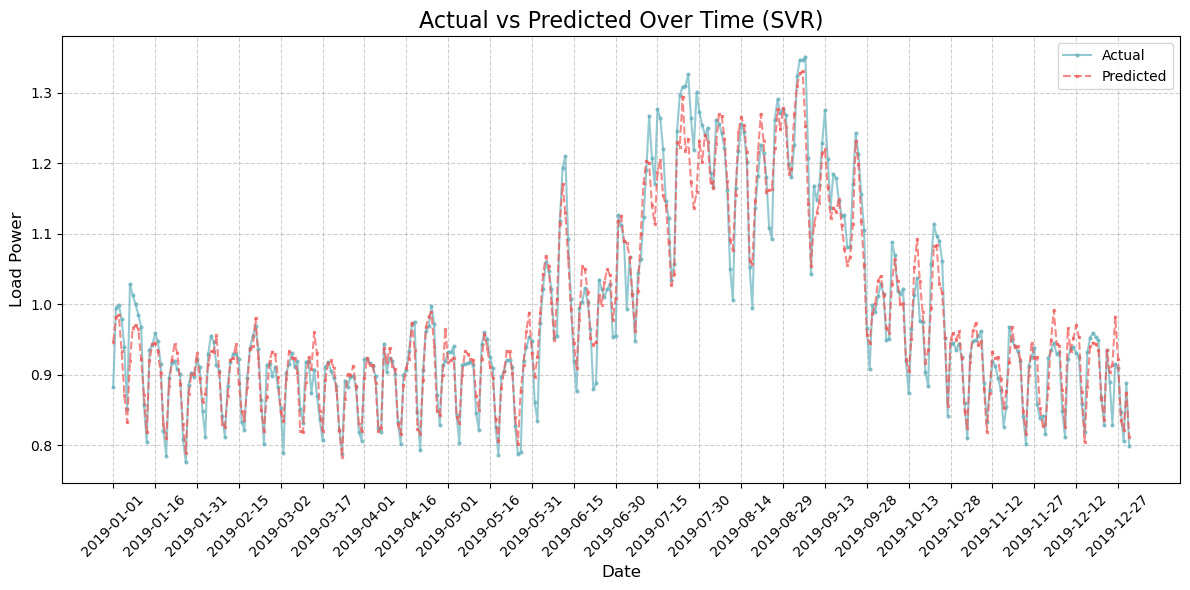

Scatter plot saved at: E:/Desktop/Scatter_Plot_Actual_vs_Predicted_SVR.png


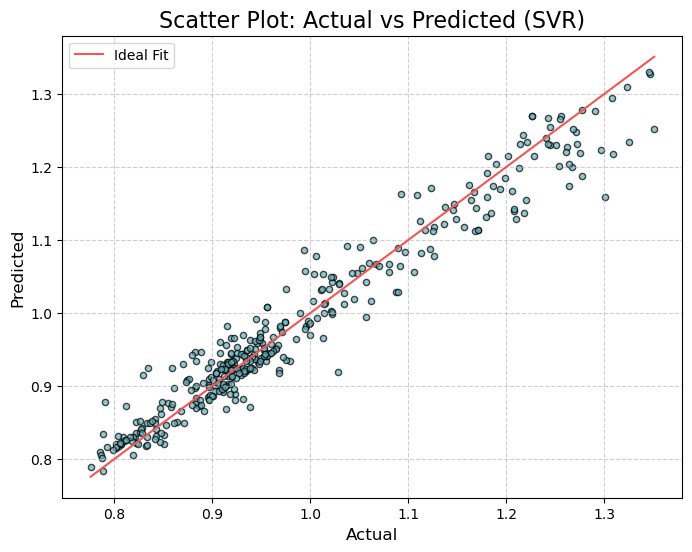

In [3]:
# SVR Visualization
import pandas as pd
import matplotlib.pyplot as plt

file_path = "SVR_Predictions.csv"
results = pd.read_csv(file_path)

# Ensure the date column is in datetime format
if 'Date' in results.columns:
    results['Date'] = pd.to_datetime(results['Date'])

print("Data Preview:")
print(results.head())

# Visualization: Line plot (Time Series - Actual vs Predicted)
plt.figure(figsize=(12, 6))
plt.plot(results["Date"], results["Actual"], label="Actual", linestyle='-', marker='o', markersize=2, alpha=0.7, color='#69b3be')
plt.plot(results["Date"], results["Predicted"], label="Predicted", linestyle='--', marker='x', markersize=2, alpha=0.7, color='#f05756')
plt.title("Actual vs Predicted Over Time (SVR)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Load Power", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust x-axis labels interval
plt.gca().set_xticks(results["Date"][::15])  # Set x-axis ticks every 15 days
plt.xticks(rotation=45)

plt.tight_layout()

output_file_path_time_series = "E:/Desktop/Actual_vs_Predicted_Over_Time_SVR.png"
plt.savefig(output_file_path_time_series, dpi=300, bbox_inches='tight')
print(f"Time Series plot saved at: {output_file_path_time_series}")

plt.show()

# Visualization: Scatter plot (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(results["Actual"], results["Predicted"], alpha=0.7, edgecolor='k', s=20, c='#69b3be')  # Use 'c' instead of 'color'
plt.plot(
    [results["Actual"].min(), results["Actual"].max()],
    [results["Actual"].min(), results["Actual"].max()],
    label="Ideal Fit", color='#f05756'
)
plt.title("Scatter Plot: Actual vs Predicted (SVR)", fontsize=16)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

output_file_path_scatter = "E:/Desktop/Scatter_Plot_Actual_vs_Predicted_SVR.png"
plt.savefig(output_file_path_scatter, dpi=300, bbox_inches='tight')
print(f"Scatter plot saved at: {output_file_path_scatter}")

plt.show()

Residual plot saved at: E:/Desktop/Residual_Plot_Over_Time_SVR.png


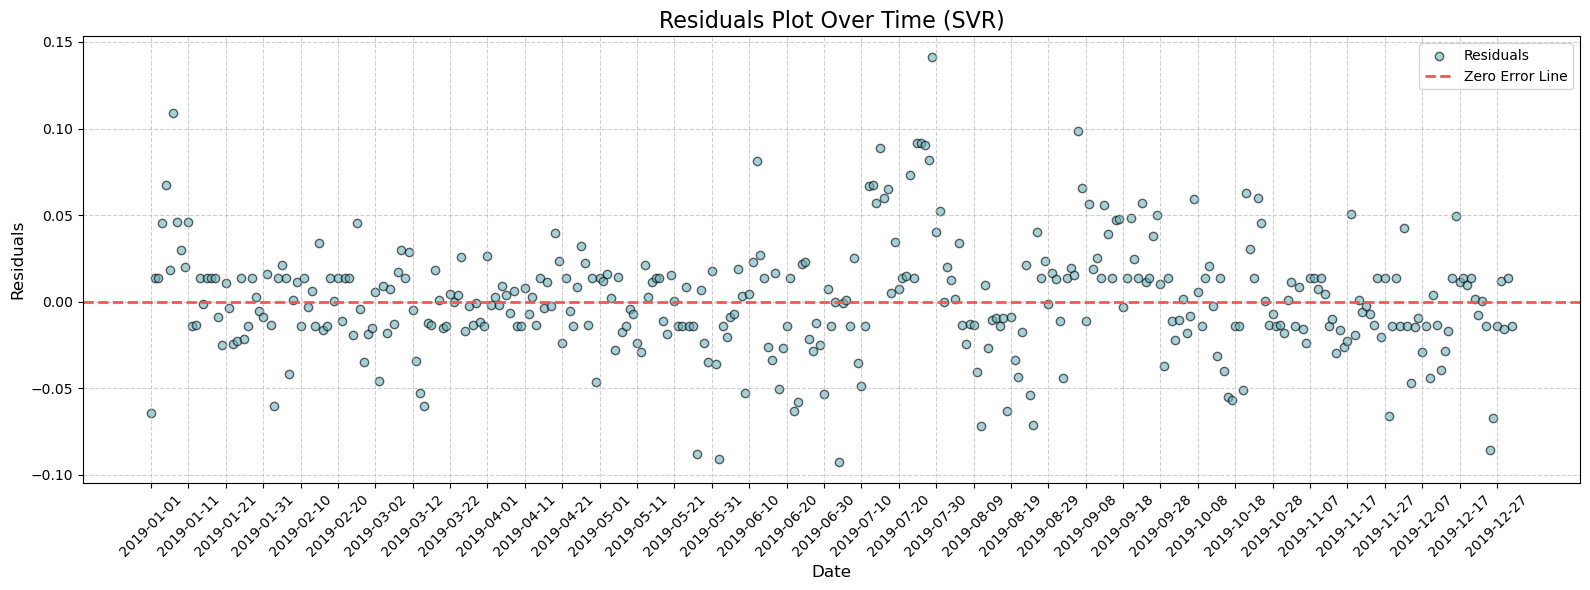

In [4]:
results_sorted['Residuals'] = results_sorted["Actual"] - results_sorted["Predicted"]

plt.figure(figsize=(16, 6))
plt.scatter(results_sorted["Date"], results_sorted["Residuals"], alpha=0.6, edgecolor='k', label="Residuals", color='#69b3be')
plt.axhline(y=0, color='#f05756', linestyle='--', linewidth=2, label="Zero Error Line")
plt.title("Residuals Plot Over Time (SVR)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.xticks(results_sorted["Date"][::10], rotation=45) 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

output_file_path_residual = "E:/Desktop/Residual_Plot_Over_Time_SVR.png"
plt.savefig(output_file_path_residual, dpi=300, bbox_inches='tight')
print(f"Residual plot saved at: {output_file_path_residual}")

plt.show()


L1 Normalized Feature Importances (Sum = 1):
               Feature  Importance  Normalized Importance
9          Temperature    0.071487               0.412828
18           Month_sin    0.026296               0.151854
8    Relative humidity    0.017262               0.099685
20         Weekday_sin    0.017197               0.099308
21         Weekday_cos    0.005582               0.032233
19           Month_cos    0.005505               0.031789
5            Dew point    0.005322               0.030735
12               VISIB    0.004318               0.024937
13                PRCP    0.004173               0.024098
10                 SLP    0.003991               0.023047
11                 STP    0.002324               0.013419
6   Solar zenith angle    0.002115               0.012211
16    Snow/Ice Pellets    0.002019               0.011660
2                  DHI    0.001609               0.009289
4                  GHI    0.001183               0.006830
0           Wind_power    

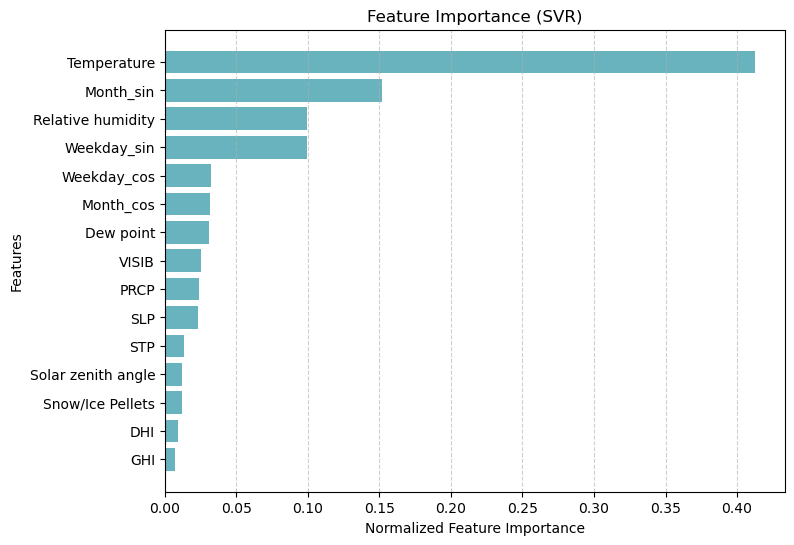

Chart has been saved to: E:/Desktop/Feature_Importance_SVR.png


In [5]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Compute Permutation Importance (based on standardized data)
perm_importance = permutation_importance(
    svr_model, X_test_scaled, y_test_scaled,  
    scoring='neg_mean_squared_error', 
    n_repeats=10, 
    random_state=42
)

# Restore feature importance to original scale
importance_rescaled = perm_importance.importances_mean * scaler_y.scale_[0]

# Create DataFrame and sort in descending order
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importance_rescaled  # Rescaled importance
}).sort_values(by="Importance", ascending=False)

# Compute L1-normalized feature importance (sum = 1)
feature_importances["Normalized Importance"] = feature_importances["Importance"] / feature_importances["Importance"].sum()

# Print normalized feature importance
print("\nL1 Normalized Feature Importances (Sum = 1):")
print(feature_importances)

# Select top 15 most important features
top_features = feature_importances.head(15)

# **Reverse order for correct visualization**
top_features = top_features[::-1]  # Flip the order

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(top_features["Feature"], top_features["Normalized Importance"], color='#69b3be')
plt.xlabel("Normalized Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (SVR)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Save
output_file_path = "E:/Desktop/Feature_Importance_SVR.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"Chart has been saved to: {output_file_path}")